In [1]:
import torch
from IPython.core.debugger import set_trace

In [2]:
def f1(x):
    res = x*x
    set_trace()
    return res

In [3]:
x = torch

# 1 EXAMPLE class 

In [4]:
import torch
import torch.nn as nn
import torch.functional as F
from collections import OrderedDict

In [5]:
layers = OrderedDict([
    ('conv1', nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5)),
    ('relu', nn.ReLU()),
    ('conv2', nn.Conv2d(20, 64, 5)),
    ('relu2', nn.ReLU())
])
model = nn.Sequential(layers)

In [6]:
""" This is recomendet by pytorch, we create new class and we inherit """
class Net(nn.Module):
    def __init__(self):
        # to odpowiada za dziedziczeenie
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool  = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(in_features=16*5*5, out_features=120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.pool(self.conv1(x)))
        x = self.pool(F.pool(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
""" Jast python wyth inherit. """

' Jast python wyth inherit. '

In [7]:
net = Net()

# 2 EXAMPLE 

In [8]:
import torch
import torch.nn as nn
import torch.functional as F
import torchvision

In [9]:
import matplotlib as plt
from pprint import pprint
import numpy as np
from numpy.linalg import inv
from numpy.linalg import multi_dot as mdot
from IPython.core.debugger import set_trace
%matplotlib inline
#from ppt.utils import attr

In [10]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [11]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [12]:
X = np.random.random((5,3))
X

array([[0.49967993, 0.40125447, 0.81911646],
       [0.92101039, 0.36499586, 0.95122501],
       [0.42365889, 0.92761235, 0.85990243],
       [0.05873783, 0.25338401, 0.35290017],
       [0.69211624, 0.44283883, 0.85043471]])

In [13]:
Y = torch.rand((5,3))
Y

tensor([[0.1692, 0.4180, 0.4231],
        [0.6183, 0.1375, 0.0830],
        [0.0739, 0.3171, 0.2896],
        [0.8514, 0.0797, 0.6452],
        [0.4537, 0.9985, 0.9924]])

In [14]:
Y.shape

torch.Size([5, 3])

In [15]:
X.shape

(5, 3)

In [16]:
X.T @ X

array([[1.75990204, 1.25103417, 2.25901774],
       [1.25103417, 1.41500148, 1.93954821],
       [2.25901774, 1.93954821, 3.1629907 ]])

In [17]:
Y.t() @ Y

tensor([[1.3471, 0.7000, 1.1439],
        [0.7000, 1.2975, 1.3224],
        [1.1439, 1.3224, 1.6709]])

In [18]:
# maciesz odwrotna
# http://matematykadlastudenta.pl/strona/463.gif
inv(X.T @ X)

array([[ 14.99195336,   8.91516621, -16.1740859 ],
       [  8.91516621,   9.73279001, -12.33539324],
       [-16.1740859 , -12.33539324,  19.43181081]])

In [19]:
# maciesz odwrotna
# http://matematykadlastudenta.pl/strona/463.gif
torch.inverse(Y.t() @ Y)

tensor([[ 2.5253,  2.0661, -3.3640],
        [ 2.0661,  5.6756, -5.9062],
        [-3.3640, -5.9062,  7.5757]])

In [20]:
A = torch.eye(3)
A.add(1)

tensor([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]])

In [21]:
# funkcje z _ na koncu so inplays
A.add_(1)

tensor([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]])

In [22]:
A[0,0]

tensor(2.)

In [23]:
A[0]# row

tensor([2., 1., 1.])

In [24]:
A[0:2]

tensor([[2., 1., 1.],
        [1., 2., 1.]])

In [25]:
A[:, 0:3]

tensor([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]])

# it izi to convert to np to torch and torch to np

In [26]:
A = torch.eye(3)
A

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

# torch ---->np

In [27]:
A.numpy()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

# np 8=====D torch

In [28]:
torch.from_numpy(np.eye(3))

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], dtype=torch.float64)

In [29]:
from torch import autograd

In [30]:
w = torch.ones(1)
w.requires_grad

False

In [31]:
z = torch.ones(1) * 2
z.requires_grad

False

In [32]:
total = w+ z
total

tensor([3.])

In [33]:
#total.backward()

In [34]:
w = torch.ones(1, requires_grad=True)
w.requires_grad

True

In [35]:
total = w+z
total.requires_grad

True

In [36]:
total.backward()

In [37]:
w.grad

tensor([1.])

In [38]:
with torch.no_grad():
    total = w +z 
total.requires_grad

False

In [39]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cup")
device

device(type='cuda', index=0)

In [40]:
# wrzucamu do gpu
data = torch.eye(3)
data.to(device)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], device='cuda:0')

# linReg, Gradient Decent

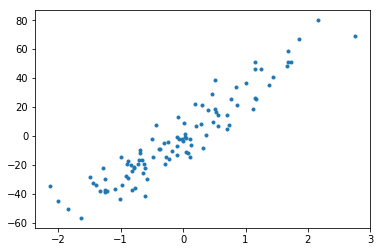

In [41]:
from sklearn.datasets import make_regression
n_features = 1
n_samples = 100
import matplotlib.pyplot as plt

X, y = make_regression(
    n_samples = n_samples,
    n_features = n_features,
    noise = 10,
)
fix, ax = plt.subplots()
ax.plot(X, y, ".")

In [42]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y.reshape((n_samples, n_features))).float()

In [43]:
from torch import nn 
from torch import optim

class LinReg(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.beta = nn.Linear(input_dim, 1)
        
    def forward(self, X):
        return self.beta(X)

In [44]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cup")
model = LinReg(n_features).to(device) # move model to gpu
optimizer = optim.SGD(model.parameters(), lr=0.000001)
criterion = nn.MSELoss()

X, y = X.to(device), y.to(device)# move data to gpu

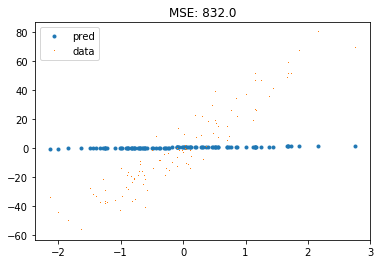

In [45]:
# to jest jak fit w kerasie tylko 1 krok
# train mode
model.train()# start train mode
optimizer.zero_grad() # set grad to 0
y_ = model(X) # dajemy dane do modelu
loss = criterion(y_, y) # to mamy pred
loss.backward(loss)# teraz cofamy losa do tylu
optimizer.step()# optymalizujemy stepy
# evaluatin mode niby na validation data
model.eval()# to jest do zobaczenie naszego wyskolonego modelu
with torch.no_grad():# mowimy ze nie interesjue nas gradient
    y_ = model(X)# dajemy date zeby byly predykcje
    
# Vis
fig, ax = plt.subplots()
ax.plot(X.cpu().numpy(), y_.cpu().numpy(), ".", label="pred")
ax.plot(X.cpu().numpy(), y.cpu().numpy(), ",", label="data")
ax.set_title(f"MSE: {loss.item():0.1f}")
ax.legend();

# debug in NN wyth Ipython set_trace

In [46]:
X = torch.rand((5,3))
#X

In [54]:
from IPython.core.debugger import set_trace
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(3, 1)
        
    def forward(self, X):
        #set_trace()
        X = self.lin(X)
        return X
model = MyModule()
y_ = model(X)

assert y_.shape == (5,1), y_.shape